In [1]:
import csv
import pandas as pd

C:\Users\Aihua Chen\anaconda\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df = pd.read_csv('out2.csv')
df.head()

C:\Users\Aihua Chen\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
0,0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
1,1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018
2,2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
3,3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
4,4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018


In [4]:
cases = df.groupby('Violation code')['Violation Description'].apply(lambda x: set(list(x))).to_frame()
cases['unique_desc'] = cases['Violation Description'].map(lambda x: len(x))
cases.sort_values(by='unique_desc', ascending=False)#.to_clipboard(sep='\t')

def clean_the_code(some_code):
    return some_code.replace(".", "").replace("*", "").replace("+", "")

cases['clean_code'] = cases.index.map(clean_the_code)
cases.head()

,Violation Description,unique_desc,clean_code
Violation code,,,
000,"{nan, 5201D, 6344K12, 22502C, 40001A, 8046, 40...",218,000
001,{21113A},1,001
002,{4000A},1,002
005,{21461},1,005
006,{22500A},1,006


In [5]:
code_lookup = dict(zip(cases.index, cases.clean_code))
df['clean_code_mapped'] = df['Violation code'].map(lambda x: code_lookup.get(x, "Checkmelater"))
df.head()

,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,clean_code_mapped
0,0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
1,1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,5200
2,2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
3,3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
4,4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B


In [6]:
df['clean_code_mapped']  = df['clean_code_mapped'].replace({'8069A':'8069AA'})
group = df.groupby('clean_code_mapped').agg({"Violation Description":"first","Ticket number":"count"}).sort_values(by='Ticket number',ascending=False)
group.head()

,Violation Description,Ticket number
clean_code_mapped,,
8069BS,NO PARK/STREET CLEAN,594541
8813B,METER EXP.,295527
8056E4,RED ZONE,166904
8058L,PREFERENTIAL PARKING,145586
5204A-,DISPLAY OF TABS,123414


In [7]:
group1 = group[group['Ticket number'] > 10000]
group1 = group1.set_index('Violation Description')

In [8]:
group1.head()

,Ticket number
Violation Description,
NO PARK/STREET CLEAN,594541
METER EXP.,295527
RED ZONE,166904
PREFERENTIAL PARKING,145586
DISPLAY OF TABS,123414


<Figure size 800x800 with 0 Axes>

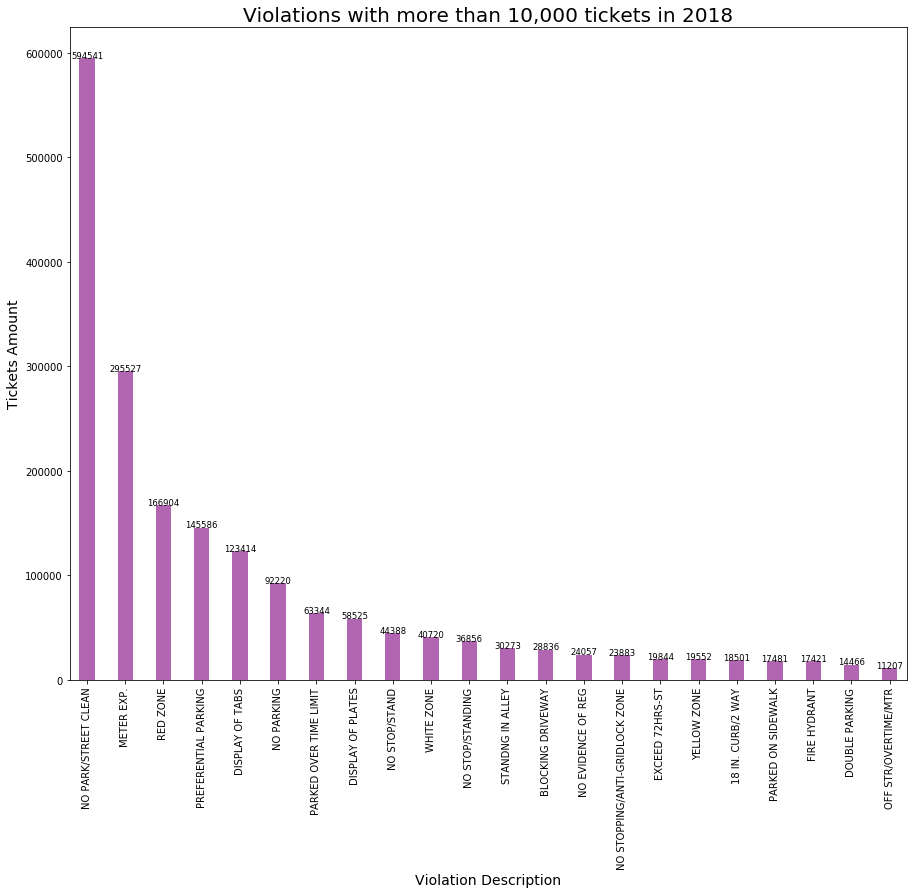

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

g = group1.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.6, figsize=(15,12), fontsize=10)
g.set_ylabel('Tickets Amount',fontsize=14)
g.set_xlabel('Violation Description',fontsize=14)
g.set_title("Violations with more than 10,000 tickets in 2018",fontsize=20)

rects = g.patches
labels = group1['Ticket number']

for rect, label in zip(rects, labels):
    g.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+8, label,
               fontsize=8.5, color='black', ha='center')
    
plt.savefig('FineTotals.jpg', dpi=1000)